In [1]:
# Useful imports
import numpy as np
from matplotlib.pyplot import figure, show
from astropy.io import fits
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# path to data
path = "/net/virgo01/data/users/mpucovsky/OAProject/2025-05-05"
pathObj = Path(path)

In [3]:
# Creates table of bias frames, for inspection
print(f"{'Filename':30s} | {'Object':20s} | {'Image type':10s} | {'Exposure time':15s} | {'Filter':10s}")
for f in pathObj.iterdir():
    hduList = fits.open(f)
    head = hduList[0].header
    name = f.name
    if "BIAS" in name:
        # accounts for possibility of missing metadata
        try:
            obj = head['OBJECT']
        except:
            obj = "OBJECT keyword N/A"

        try:
            imType = head['IMAGETYP']
        except:
            imType = "IMAGETYP keyword N/A"

        try:
            expt = str(head['EXPTIME'])
        except:
            expt = "EXPTIME keyword N/A"

        try:
            filt = head['FILTER']
        except:
            filt = "FILTER keyword N/A"

        print(f"{name:30s} | {obj:20s} | {imType:10s} | {expt:15s} | {filt:10s}")
    hduList.close()


Filename                       | Object               | Image type | Exposure time   | Filter    
LDST_250505-0011_BIAS.fit      | LDST_250505          | BIAS       | 0.0             | FILTER keyword N/A
LDST_250505-0001_BIAS.fit      | LDST_250505          | BIAS       | 0.0             | FILTER keyword N/A
LDST_250505-0006_BIAS.fit      | LDST_250505          | BIAS       | 0.0             | FILTER keyword N/A
LDST_250505-0009_BIAS.fit      | LDST_250505          | BIAS       | 0.0             | FILTER keyword N/A
LDST_250505-0010_BIAS.fit      | LDST_250505          | BIAS       | 0.0             | FILTER keyword N/A
LDST_250505-0011_BIAS3.fit     | LDST_250505          | BIAS       | 0.0             | FILTER keyword N/A
LDST_250505-0010_BIAS3.fit     | LDST_250505          | BIAS       | 0.0             | FILTER keyword N/A
LDST_250505-0008_BIAS.fit      | LDST_250505          | BIAS       | 0.0             | FILTER keyword N/A
LDST_250505-0007_BIAS.fit      | LDST_250505          

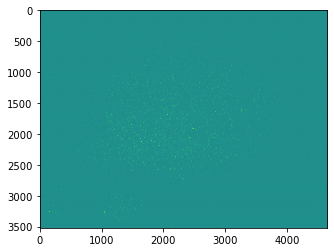

In [4]:
# Creates 1x1 binning master bias frame
# finds all bias frames
biasFrames = []
for f in pathObj.iterdir():
    hduList = fits.open(f)
    head = hduList[0].header
    name = f.name
    if "BIAS" in name and "BIAS3" not in name:
        data = hduList[0].data
        header = head
        biasFrames.append(data)
        
# stacks bias frames into master bias
biasCube = np.stack(biasFrames)
masterBias = np.median(biasCube, axis=0)

# writes master bias to .fit file
primary = fits.PrimaryHDU(masterBias, header)
hdu = fits.HDUList([primary])
pathW = path+"/L10_MBias.fit"
hdu.writeto(pathW, overwrite=True)

# displays bias frame - sets vmin and vmax so that the small differences can be seen visually
fig = figure()
figAxes = fig.add_subplot(1,1,1)
figAxes.imshow(masterBias, vmin = 15, vmax = 17, cmap="viridis")

show()

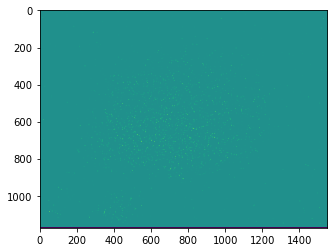

In [5]:
# Creates 3x3 binning master bias frame
# finds all bias frames
biasFrames = []
for f in pathObj.iterdir():
    hduList = fits.open(f)
    head = hduList[0].header
    name = f.name
    if "BIAS3" in name:
        data = hduList[0].data
        header = head
        biasFrames.append(data)
        
# stacks bias frames into master bias
biasCube = np.stack(biasFrames)
masterBias = np.median(biasCube, axis=0)

# writes master bias to .fit file
primary = fits.PrimaryHDU(masterBias, header)
hdu = fits.HDUList([primary])
pathW = path+"/L10_MBias3.fit"
hdu.writeto(pathW, overwrite=True)

# displays bias frame - sets vmin and vmax so that the small differences can be seen visually
fig = figure()
figAxes = fig.add_subplot(1,1,1)
figAxes.imshow(masterBias, vmin = 15, vmax = 17, cmap="viridis")

show()